<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Week5_DEM_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEM and Hillshade Gird load and visulization

In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [2]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others
%pip install gdal
%pip install elevation

     |████████████████████████████████| 1.4MB 8.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 26.9MB/s 
     |████████████████████████████████| 18.3MB 237kB/s 
     |████████████████████████████████| 14.8MB 186kB/s 
     |████████████████████████████████| 6.5MB 41.4MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=c60fc2e57d98be2fd16b56dace6673cbbeae447cd0bb7571b38d7a298fbd5a22
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy
     |████████████████████████████████| 71kB 5.4MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [3]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from osgeo import gdal
import elevation 


In [4]:
%pwd

'/content'

In [5]:
#Many issue with CD to the Shared drive location but if I remove the % the cd function seems to work. 
#However, it may be necessary to cd folder by folder. 
#cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data

/content/gdrive/Shared drives/GEOL557_Group_Project/data


In [6]:
%ls #verify the files

 AVGVISIB_85S_060M_201608_clp_rs10m.tfw
 AVGVISIB_85S_060M_201608_clp_rs10m.tif
 dp_archsis.pdf
'dp_sis (1).pdf'
 polar_south_80_summer_max_sp240m_clp_rs10m1.tfw
 polar_south_80_summer_max_sp240m_clp_rs10m1.tif
 polar_south_80_summer_max.txt
 polar_south_80_sw_max_diff.png
 polar_south_80_sw_max_diff.txt
 polar_south_80_winter_min.png
 polar_south_80_winter_min.txt
 Shapefiles/
 spoledem10m_clp.tfw
 spoledem10m_clp.tif


In [7]:
with rio.open('spoledem10m_clp.tif') as spDEM10m: #open the geotif file with RasterIO
      spDEM10m_np= spDEM10m.read(1)


In [8]:
spDEM10m 

<closed DatasetReader name='spoledem10m_clp.tif' mode='r'>

In [9]:
spDEM10m_np #numpy array 

array([[ -655,  -656,  -656, ...,  -813,  -813,  -813],
       [ -655,  -656,  -656, ...,  -812,  -812,  -812],
       [ -655,  -656,  -656, ...,  -811,  -811,  -811],
       ...,
       [-2346, -2347, -2348, ..., -1512, -1512, -1512],
       [-2346, -2347, -2348, ..., -1512, -1512, -1511],
       [-2346, -2347, -2348, ..., -1510, -1511, -1510]], dtype=int16)

In [10]:
df_spDEM10m = pd.DataFrame(data=spDEM10m_np) #Numpy array to Pandas dataframe

In [11]:
df_spDEM10m.iloc[0:5, 0:10] #look at a corner of the data array

,0,1,2,3,4,5,6,7,8,9
0,-655,-656,-656,-657,-658,-659,-660,-660,-661,-662
1,-655,-656,-656,-657,-658,-658,-659,-660,-661,-661
2,-655,-656,-656,-657,-657,-658,-659,-659,-660,-661
3,-655,-656,-656,-657,-657,-658,-658,-659,-660,-660
4,-655,-656,-656,-657,-657,-658,-658,-659,-659,-660


In [12]:
df_spDEM10m.info() #get info on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10768 entries, 0 to 10767
Columns: 11620 entries, 0 to 11619
dtypes: int16(11620)
memory usage: 238.7 MB


In [ ]:
#Plot out data with Matplotlib's 'contour'
fig, ax = plt.subplots(figsize=(12, 8))
#fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(spDEM10m_np,  levels = list(range(-5000, 5000, 1000))) #, %cmap = 'gray')
plt.title("Elevation Contours")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
#ax.imshow(hillshade, cmap="Greys", alpha=0.5)
ep.plot_bands(
    df_spDEM10m,
    ax=ax,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(12, 8),
)
plt.show()

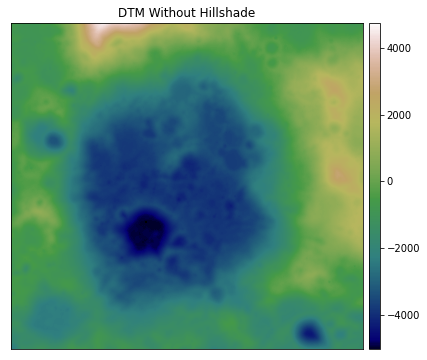

In [14]:
# use EarthPy to plot the data with the instructions from this link 
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_spDEM10m,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    figsize=(10, 6),
)
plt.show()

NameError: ignored

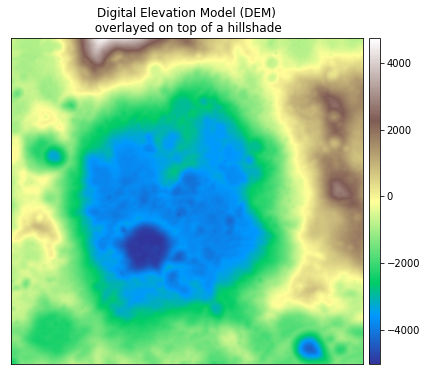

In [15]:
# Plot the DEM and hillshade at the same time

fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    df_spDEM10m,
    ax=ax,
    cmap="terrain",
    title="Digital Elevation Model (DEM)\n overlayed on top of a hillshade",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5)
plt.show()